In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from keras.layers import Embedding, GRU, Dense, Dropout
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\BINJAL SONI\OneDrive\Desktop\PDPU-Master\2nd Sem\Capstone Project\Fake News Detection\Datasets\21-02-2023\FakeNews_and_Clickbait_Detection.csv')
df.head(5)

,id,tweet,fake_news,clickbait
0,1,The CDC currently reports 99031 deaths. In gen...,real,0
1,2,States reported 1121 deaths a small rise from ...,real,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0
4,5,Populous states can generate large case counts...,real,0


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()



In [4]:
df.rename(columns={"fake_news": "label"}, inplace=True)

df

,id,tweet,label,clickbait
0,1,The CDC currently reports 99031 deaths. In gen...,real,0
1,2,States reported 1121 deaths a small rise from ...,real,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0
4,5,Populous states can generate large case counts...,real,0
...,...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake,1
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake,0


In [5]:
le = LabelEncoder()

# Fit and transform the 'color' column
df['label'] = le.fit_transform(df['label'])

print(df)

        id                                              tweet  label  \
0        1  The CDC currently reports 99031 deaths. In gen...      1   
1        2  States reported 1121 deaths a small rise from ...      1   
2        3  Politically Correct Woman (Almost) Uses Pandem...      0   
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      1   
4        5  Populous states can generate large case counts...      1   
...    ...                                                ...    ...   
6415  6416  A tiger tested positive for COVID-19 please st...      0   
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      0   
6417  6418  _A post claims a COVID-19 vaccine has already ...      0   
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      0   
6419  6420  It has been 93 days since the last case of COV...      1   

      clickbait  
0             0  
1             0  
2             1  
3             0  
4             0  
...         ...  
6415     

In [6]:

print(df)

        id                                              tweet  label  \
0        1  The CDC currently reports 99031 deaths. In gen...      1   
1        2  States reported 1121 deaths a small rise from ...      1   
2        3  Politically Correct Woman (Almost) Uses Pandem...      0   
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      1   
4        5  Populous states can generate large case counts...      1   
...    ...                                                ...    ...   
6415  6416  A tiger tested positive for COVID-19 please st...      0   
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      0   
6417  6418  _A post claims a COVID-19 vaccine has already ...      0   
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      0   
6419  6420  It has been 93 days since the last case of COV...      1   

      clickbait  
0             0  
1             0  
2             1  
3             0  
4             0  
...         ...  
6415     

In [7]:
df

,id,tweet,label,clickbait
0,1,The CDC currently reports 99031 deaths. In gen...,1,0
1,2,States reported 1121 deaths a small rise from ...,1,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,0,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1,0
4,5,Populous states can generate large case counts...,1,0
...,...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,0,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,0,1
6417,6418,_A post claims a COVID-19 vaccine has already ...,0,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0,0


In [8]:
df = df.set_index('id')

In [9]:
df

,tweet,label,clickbait
id,,,
1,The CDC currently reports 99031 deaths. In gen...,1,0
2,States reported 1121 deaths a small rise from ...,1,0
3,Politically Correct Woman (Almost) Uses Pandem...,0,1
4,#IndiaFightsCorona: We have 1524 #COVID testin...,1,0
5,Populous states can generate large case counts...,1,0
...,...,...,...
6416,A tiger tested positive for COVID-19 please st...,0,0
6417,???Autopsies prove that COVID-19 is??� a blood...,0,1
6418,_A post claims a COVID-19 vaccine has already ...,0,0


In [10]:
df = df.dropna()

In [11]:
X = df.drop('label', axis = 1)

In [12]:
y = df['label']

In [13]:
X

,tweet,clickbait
id,,
1,The CDC currently reports 99031 deaths. In gen...,0
2,States reported 1121 deaths a small rise from ...,0
3,Politically Correct Woman (Almost) Uses Pandem...,1
4,#IndiaFightsCorona: We have 1524 #COVID testin...,0
5,Populous states can generate large case counts...,0
...,...,...
6416,A tiger tested positive for COVID-19 please st...,0
6417,???Autopsies prove that COVID-19 is??� a blood...,1
6418,_A post claims a COVID-19 vaccine has already ...,0


In [14]:
y

id
1       1
2       1
3       0
4       1
5       1
       ..
6416    0
6417    0
6418    0
6419    0
6420    1
Name: label, Length: 6420, dtype: int32

In [15]:
X.shape

(6420, 2)

In [16]:
y.shape

(6420,)

In [17]:
voc_size = 5000

msg = X.copy()

In [18]:
#reset the index to get the proper count
msg.reset_index(inplace = True)

In [19]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
corpus = []
for i in range(0, len(msg)):
   
    review = re.sub('[^a-zA-Z]', ' ', msg['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
from tensorflow.keras.layers import Bidirectional

In [22]:
len(corpus)

6420

In [23]:
msg['tweet'][0]

'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.'

In [24]:
onehot_representation = [one_hot(words, voc_size) for words in corpus]

In [25]:
sent_length = 20
embeded_docs = pad_sequences(onehot_representation, padding = "pre", maxlen = sent_length)

embeded_docs[0]

array([   0,    0, 2402, 4875, 1882, 3672, 3727, 4742, 3672, 1819, 2979,
       2547,  970, 4596, 3672, 1880, 4290,  658, 2676, 2384])

In [26]:
#Building a model 
dimension = 40
model = Sequential()
model.add(Embedding(voc_size, dimension, input_length = sent_length))
model.add(GRU(100))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 gru (GRU)                   (None, 100)               42600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 242,701
Trainable params: 242,701
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
X_final = np.array(embeded_docs)


In [28]:
y_final = np.array(y)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [30]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 64)


Epoch 1/5
81/81 [==============================] - 5s 20ms/step - loss: 0.4436 - accuracy: 0.7804 - val_loss: 0.2688 - val_accuracy: 0.8917
Epoch 2/5
81/81 [==============================] - 2s 26ms/step - loss: 0.1523 - accuracy: 0.9402 - val_loss: 0.2597 - val_accuracy: 0.8988
Epoch 3/5
81/81 [==============================] - 3s 32ms/step - loss: 0.0718 - accuracy: 0.9764 - val_loss: 0.3107 - val_accuracy: 0.8941
Epoch 4/5
81/81 [==============================] - 2s 21ms/step - loss: 0.0382 - accuracy: 0.9868 - val_loss: 0.3649 - val_accuracy: 0.8902
Epoch 5/5
81/81 [==============================] - 1s 17ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.3976 - val_accuracy: 0.8785


In [31]:
y_pred = model.predict(X_test)
y_pred



41/41 [==============================] - 1s 9ms/step


array([[0.00193748],
       [0.9999943 ],
       [0.9999751 ],
       ...,
       [0.9999994 ],
       [0.9999238 ],
       [0.99996287]], dtype=float32)

In [32]:
from sklearn.metrics import confusion_matrix
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)



41/41 [==============================] - 0s 8ms/step
[0. 1. 1. ... 1. 1. 1.]
[0 1 1 ... 1 1 1]
[[509  87]
 [ 69 619]]


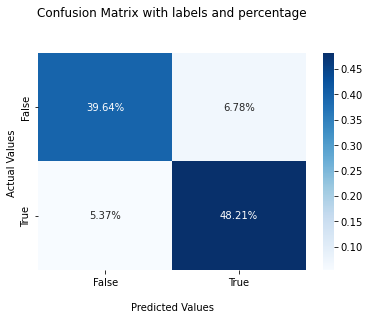

In [33]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix with labels and percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.85      0.87       596
           1       0.88      0.90      0.89       688

    accuracy                           0.88      1284
   macro avg       0.88      0.88      0.88      1284
weighted avg       0.88      0.88      0.88      1284



In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))



0.8785046728971962


In [36]:
model.save('fake_model_with_clickbait.h5')